# Solução 1 - Empilhar as imagens dos elementos

In [1]:
#Importando dependências necessárias

import cv2 #caso necessário, instale com pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from PIL import Image

#Lendo as imagens.
img1 = cv2.imread('Fe.PNG')
img2 = cv2.imread('Ni.PNG')
img3 = cv2.imread('Al.PNG')
img4 = cv2.imread('P.PNG')
img5 = cv2.imread('C.PNG')

In [2]:
#Verificando se o retorno das imagens são matrizes
print('Imagem 1: \n', img1, '\n')
print('Imagem 2: \n', img2, '\n')
print('Imagem 3: \n', img3, '\n')
print('Imagem 4: \n', img4, '\n')
print('Imagem 5: \n', img5, '\n')

Imagem 1: 
 [[[ 68  68 255]
  [ 39  39 254]
  [ 34  34 252]
  ...
  [ 34  34 222]
  [ 34  34 225]
  [ 39  39 226]]

 [[ 40  40 255]
  [  7   7 254]
  [  1   1 251]
  ...
  [  1   1 217]
  [  1   1 221]
  [  7   7 222]]

 [[ 39  39 255]
  [  5   5 254]
  [  0   0 252]
  ...
  [  0   0 216]
  [  0   0 220]
  [  5   5 221]]

 ...

 [[ 39  39 249]
  [  5   5 247]
  [  0   0 244]
  ...
  [  0   0 179]
  [  0   0 178]
  [  5   5 179]]

 [[ 39  39 253]
  [  5   5 252]
  [  0   0 250]
  ...
  [  0   0 175]
  [  0   0 174]
  [  5   5 175]]

 [[ 82  82 253]
  [ 55  55 253]
  [ 51  51 252]
  ...
  [ 51  51 190]
  [ 51  51 189]
  [ 55  55 191]]] 

Imagem 2: 
 [[[243 245 243]
  [236 240 236]
  [233 238 233]
  ...
  [233 235 233]
  [233 235 233]
  [233 235 233]]

 [[184 197 184]
  [148 168 148]
  [132 157 132]
  ...
  [129 143 129]
  [129 141 129]
  [132 143 132]]

 [[121 146 121]
  [ 55  92  55]
  [ 24  72  24]
  ...
  [ 19  44  19]
  [ 19  41  19]
  [ 24  46  24]]

 ...

 [[169 246 169]
  [127 242

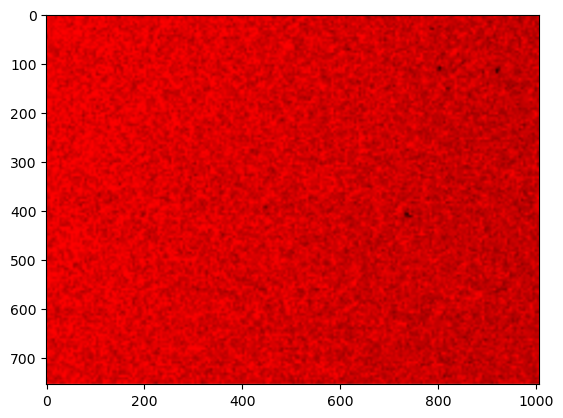

In [3]:
#Printando as imagens. Utilizei COLOR_BGR2RGB dentro da dependência cv2 para que a imagem apareça em RGB, com sua cor correta.
#Sem a extensão, o natural do pacote é mostrar imagens BGR.
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

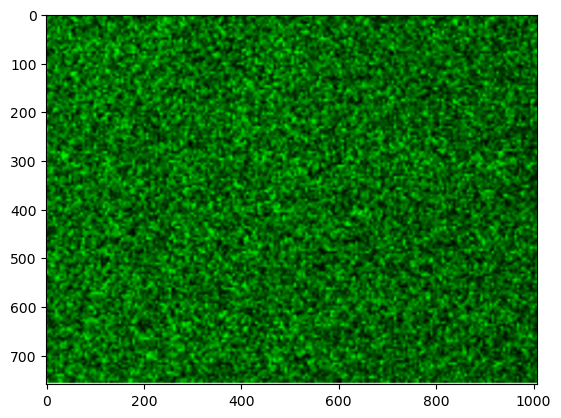

In [4]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

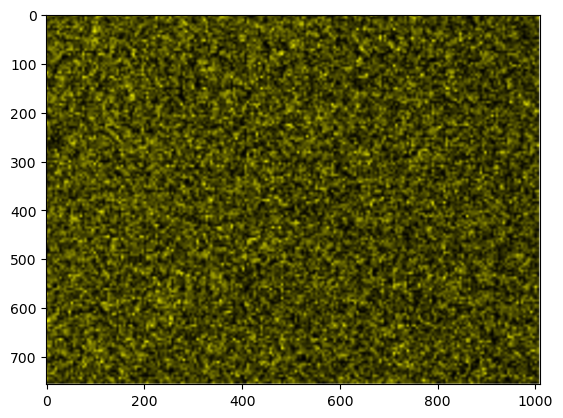

In [5]:
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

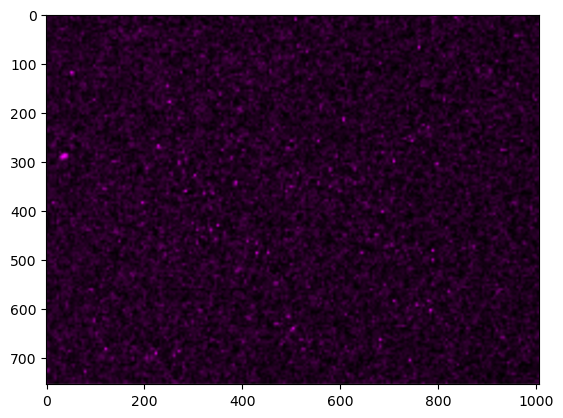

In [6]:
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

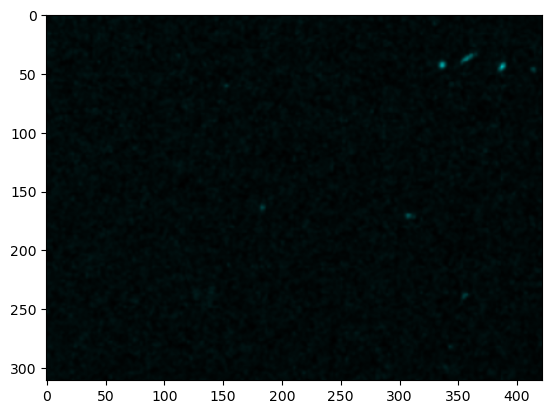

In [7]:
#Aqui temos nossa imagem com o carbono que não queremos
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))

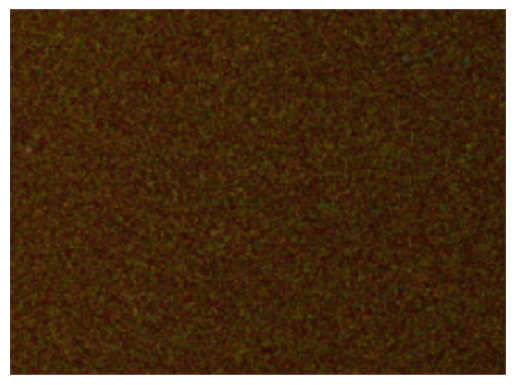

In [8]:
#Redefinindo o tamanho das imagens de acordo com a imagem 5 (carbono) caso estejam um pouco divergentes
img1 = cv2.resize(img1, (img5.shape[1], img5.shape[0]))
img2 = cv2.resize(img2, (img5.shape[1], img5.shape[0]))
img3 = cv2.resize(img3, (img5.shape[1], img5.shape[0]))
img4 = cv2.resize(img4, (img5.shape[1], img5.shape[0]))

#Empilhando e dividindo as 5 imagens 
stacked_images = (img1.astype(np.float64) + img2.astype(np.float64) + img3.astype(np.float64) + img4.astype(np.float64) + img5.astype(np.float64)) / 5


stacked_images = stacked_images.astype(np.uint8)


plt.imshow(cv2.cvtColor(stacked_images, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

In [9]:
#Identificando o pixel mais brilhante da imagem
np.where(img5 == img5.max())

(array([44, 44], dtype=int64),
 array([388, 388], dtype=int64),
 array([0, 1], dtype=int64))

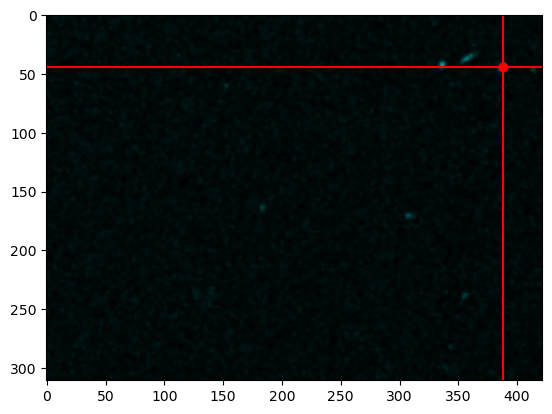

In [10]:
#Definindo as coordenadas dos pixels mais brilhantes
y0 = 44
x0 = 388

plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.plot(x0, y0, 'ro')
plt.axvline(x0, color='r')
plt.axhline(y0, color='r')

In [11]:
#Definindo um limite para os pixels mais brilhantes.
bright_limit = 40

In [12]:
#Utilizando transpose para encontrar as coordenadas dos pixels mais brilhantes
bright_coords = np.transpose(np.where(img5 > bright_limit))

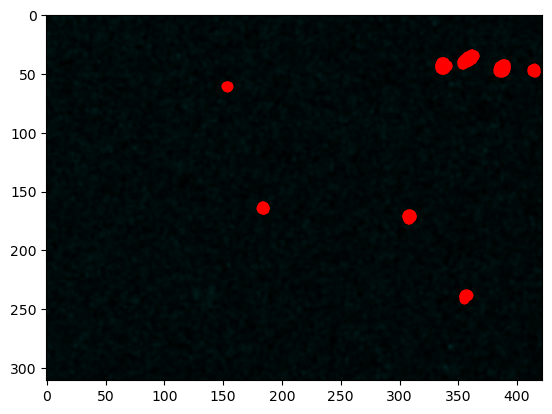

In [13]:
#Plotando imagem original, identificando os pixels mais brilhantes
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
for coord in bright_coords:
    y0, x0 = coord[0], coord[1]
    plt.plot(x0, y0, 'ro')

In [14]:
#Atribuindo um valor 0 aos pixels para removê-los
for coord in bright_coords:
    y0, x0 = coord[0], coord[1]
    img5[y0, x0] = 0

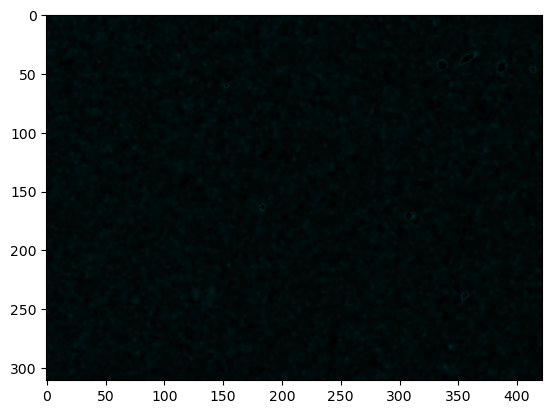

In [15]:
#Plotando imagem após a remoção dos pixels brilhantes
plt.figure()
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()

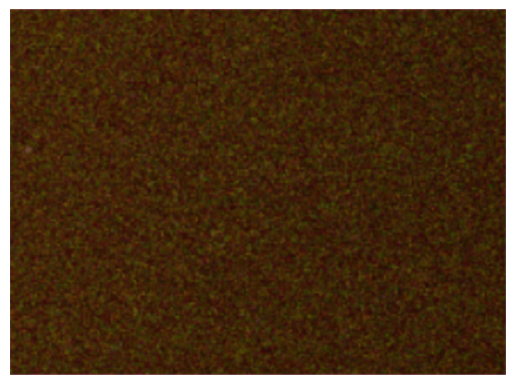

In [16]:
img1 = cv2.resize(img1, (img5.shape[1], img5.shape[0]))
img2 = cv2.resize(img2, (img5.shape[1], img5.shape[0]))
img3 = cv2.resize(img3, (img5.shape[1], img5.shape[0]))
img4 = cv2.resize(img4, (img5.shape[1], img5.shape[0]))


stacked_images_without_carbon = (img1.astype(np.float64) + img2.astype(np.float64) + img3.astype(np.float64) + img4.astype(np.float64) + img5.astype(np.float64)) / 5


stacked_images_without_carbon = stacked_images_without_carbon.astype(np.uint8)


plt.imshow(cv2.cvtColor(stacked_images_without_carbon, cv2.COLOR_BGR2RGB)) #aumentar range do brilho vmin e vmax
plt.axis('off')  
plt.show()

In [17]:
img_data = np.array(stacked_images_without_carbon)

#Criando um arquivo FITS
hdu = fits.PrimaryHDU(img_data)
hdul = fits.HDUList([hdu])

#Salvando o arquivo FITS
hdul.writeto('stacked_images_without_carbon.fits')

# Solução 2 - Identificar pixels mais brilhantes da imagem completa

In [18]:
full_image = cv2.imread('full_image.PNG')

In [19]:
print('Imagem 1: \n', full_image, '\n')

Imagem 1: 
 [[[ 20 121 171]
  [ 21 121 171]
  [ 27 117 173]
  ...
  [  6 107 147]
  [  7 101 145]
  [  9  98 147]]

 [[ 22 100 171]
  [ 25 102 172]
  [ 31 113 173]
  ...
  [  7  93 148]
  [  9  83 145]
  [ 12  82 145]]

 [[ 25  78 172]
  [ 29  81 173]
  [ 34 104 175]
  ...
  [ 10  79 149]
  [ 13  65 145]
  [ 15  66 144]]

 ...

 [[ 23  96 160]
  [ 25 103 161]
  [ 27 118 162]
  ...
  [ 15  67 128]
  [ 15  62 128]
  [ 14  56 128]]

 [[ 22 101 162]
  [ 23 107 163]
  [ 23 116 164]
  ...
  [ 18  67 127]
  [ 17  56 125]
  [ 16  52 124]]

 [[ 22 108 162]
  [ 22 112 163]
  [ 19 115 165]
  ...
  [ 19  64 127]
  [ 19  50 125]
  [ 19  47 123]]] 



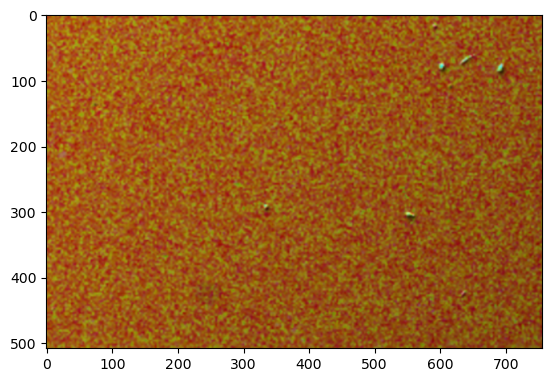

In [20]:
plt.imshow(cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB))

In [21]:
np.where(full_image == full_image.max())

(array([77], dtype=int64), array([602], dtype=int64), array([1], dtype=int64))

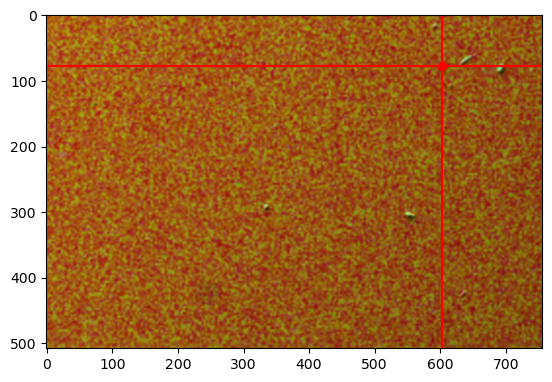

In [22]:
y0 = 77
x0 = 602

plt.imshow(cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB))
plt.plot(x0, y0, 'ro')
plt.axvline(x0, color='r')
plt.axhline(y0, color='r')

In [23]:
#Definindo um limite para os pixels mais brilhantes. Pela matriz da imagem 5 já temos como ter uma ideia de qual limite definir.
bright_limit = 200

In [24]:
#Utilizando transpose para encontrar as coordenadas dos pixels mais brilhantes
bright_coords = np.transpose(np.where(full_image > bright_limit))

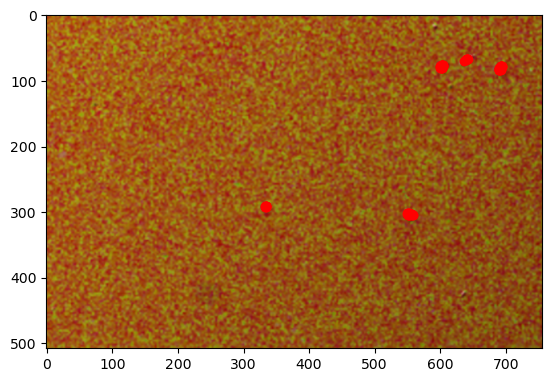

In [25]:
#Plotando imagem original, identificando os pixels mais brilhantes
plt.imshow(cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB))
for coord in bright_coords:
    y0, x0 = coord[0], coord[1]
    plt.plot(x0, y0, 'ro')

In [26]:
#Atribuindo um valor 0 aos pixels para removê-los
for coord in bright_coords:
    y0, x0 = coord[0], coord[1]
    full_image[y0, x0] = 0

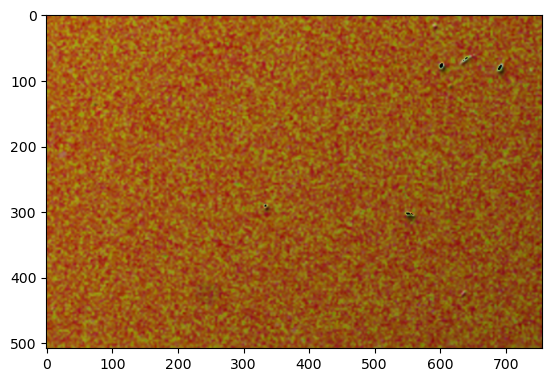

In [27]:
#Plotando imagem após a remoção dos pixels brilhantes
plt.figure()
plt.imshow(cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
img_data = np.array(full_image)

#Criando um arquivo FITS
hdu = fits.PrimaryHDU(img_data)
hdul = fits.HDUList([hdu])

#Salvando o arquivo FITS
hdul.writeto('full_image.fits')

# Solução 3 - Identificar a cor azul da imagem completa

In [29]:
full_image = cv2.imread('full_image.PNG')

In [30]:
image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)

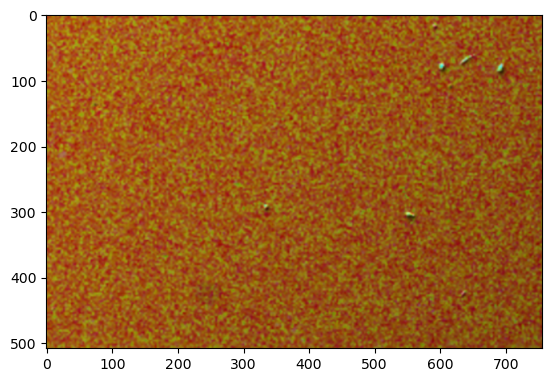

In [31]:
plt.imshow(image)

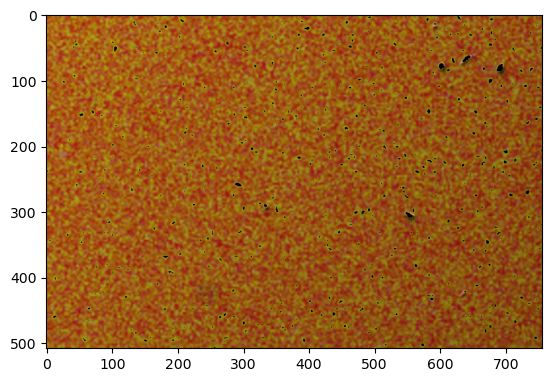

In [39]:
#Convertendo a imagem para o espaço de cores HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#Definido o intervalo de cor azul em HSV
lower_blue = np.array([90, 50, 50]) 
upper_blue = np.array([130, 255, 255])  

#Criando máscara para os pixels azuis
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

#Aplicando a máscara na imagem
result = cv2.bitwise_and(image, image, mask=mask)

#Conversão para RGB para vermos a imagem com as cores originais
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

#Plot da imagem final
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
img_data = np.array(result)

#Criando um arquivo FITS
hdu = fits.PrimaryHDU(img_data)
hdul = fits.HDUList([hdu])

#Salvando o arquivo FITS
hdul.writeto('result.fits')

# Solução 4 - Não empilhar as imagens dos elementos com Carbono

In [34]:
#Lendo as imagens.
img1 = cv2.imread('Fe.PNG')
img2 = cv2.imread('Ni.PNG')
img3 = cv2.imread('Al.PNG')
img4 = cv2.imread('P.PNG')

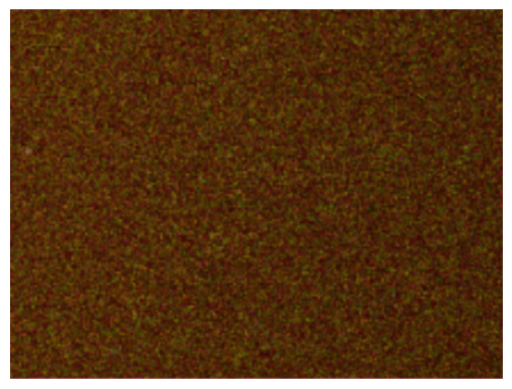

In [35]:
img1 = cv2.resize(img1, (img4.shape[1], img4.shape[0]))
img2 = cv2.resize(img2, (img4.shape[1], img4.shape[0]))
img3 = cv2.resize(img3, (img4.shape[1], img4.shape[0]))



stacked_images = (img1.astype(np.float64) + img2.astype(np.float64) + img3.astype(np.float64) + img4.astype(np.float64)) / 4


stacked_images = stacked_images.astype(np.uint8)


plt.imshow(cv2.cvtColor(stacked_images, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

In [36]:
img_data = np.array(stacked_images)

#Criando um arquivo FITS
hdu = fits.PrimaryHDU(img_data)
hdul = fits.HDUList([hdu])

#Salvando o arquivo FITS
hdul.writeto('stacked_images.fits')